In [90]:
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



from sklearn.metrics import roc_curve, auc

pd.set_option('display.max_columns', None)

In [91]:
#drop base_egg_steps
#binning experience growth, capture rate
pokemon = pd.read_csv('Pokemon_cleaned.csv')
pokemon.head()

,Unnamed: 0,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,name,sp_attack,sp_defense,speed,type1,type2,weight_kg,is_legendary
0,0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,0.45,49,1059860,0.7,45,Bulbasaur,65,65,45,grass,poison,6.9,0
1,1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,0.45,63,1059860,1.0,60,Ivysaur,80,80,60,grass,poison,13.0,0
2,2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,0.45,123,1059860,2.0,80,Venusaur,122,120,80,grass,poison,100.0,0
3,3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,0.45,43,1059860,0.6,39,Charmander,60,50,65,fire,none,8.5,0
4,4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,0.45,58,1059860,1.1,58,Charmeleon,80,65,80,fire,none,19.0,0


In [92]:
pokemon.isnull().sum()

Unnamed: 0           0
against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
defense              0
experience_growth    0
height_m             0
hp                   0
name                 0
sp_attack            0
sp_defense           0
speed                0
type1                0
type2                0
weight_kg            0
is_legendary         0
dtype: int64

In [93]:
pokemon = pokemon.set_index('name')
pokemon.head()

,Unnamed: 0,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,sp_attack,sp_defense,speed,type1,type2,weight_kg,is_legendary
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,0.45,49,1059860,0.7,45,65,65,45,grass,poison,6.9,0
Ivysaur,1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,0.45,63,1059860,1.0,60,80,80,60,grass,poison,13.0,0
Venusaur,2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,0.45,123,1059860,2.0,80,122,120,80,grass,poison,100.0,0
Charmander,3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,0.45,43,1059860,0.6,39,60,50,65,fire,none,8.5,0
Charmeleon,4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,0.45,58,1059860,1.1,58,80,65,80,fire,none,19.0,0


In [94]:
df = pd.get_dummies(pokemon)

In [95]:
df

,Unnamed: 0,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,sp_attack,sp_defense,speed,weight_kg,is_legendary,type1_bug,type1_dark,type1_dragon,type1_electric,type1_fairy,type1_fighting,type1_fire,type1_flying,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water,type2_bug,type2_dark,type2_dragon,type2_electric,type2_fairy,type2_fighting,type2_fire,type2_flying,type2_ghost,type2_grass,type2_ground,type2_ice,type2_none,type2_normal,type2_poison,type2_psychic,type2_rock,type2_steel,type2_water
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,0,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,0.45,49,1059860,0.7,45,65,65,45,6.9,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
Ivysaur,1,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,0.45,63,1059860,1.0,60,80,80,60,13.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
Venusaur,2,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,0.45,123,1059860,2.0,80,122,120,80,100.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
Charmander,3,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,0.45,43,1059860,0.6,39,60,50,65,8.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
Charmeleon,4,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,0.45,58,1059860,1.1,58,80,65,80,19.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Celesteela,796,0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,0.25,0.0,1.0,0.5,0.0,0.5,1.0,0.5,1.0,101,30720,0,570,0.25,103,1250000,9.2,97,107,101,61,999.9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Kartana,797,1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,0.25,1.0,1.0,0.5,0.0,0.5,0.5,0.5,0.5,181,30720,0,570,2.55,131,1250000,0.3,59,59,31,109,0.1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
Guzzlord,798,2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,0.50,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.5,101,30720,0,570,0.15,53,1250000,5.5,223,97,53,43,888.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [96]:
X, y = df.drop(['is_legendary'], axis = 1), df['is_legendary']
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.7, test_size = 0.3, stratify = y)
y.value_counts()

0    731
1     70
Name: is_legendary, dtype: int64

In [97]:
train_X

,Unnamed: 0,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,sp_attack,sp_defense,speed,weight_kg,type1_bug,type1_dark,type1_dragon,type1_electric,type1_fairy,type1_fighting,type1_fire,type1_flying,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water,type2_bug,type2_dark,type2_dragon,type2_electric,type2_fairy,type2_fighting,type2_fire,type2_flying,type2_ghost,type2_grass,type2_ground,type2_ice,type2_none,type2_normal,type2_poison,type2_psychic,type2_rock,type2_steel,type2_water
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Mr. Mime,121,1.0,1.0,0.0,1.0,1.0,0.25,1.0,1.0,2.0,1.00,1.0,1.0,1.0,2.0,0.50,1.0,2.0,1.0,45,6400,70,460,0.45,65,1000000,1.3,40,100,120,90,54.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Electabuzz,124,1.0,1.0,1.0,0.5,1.0,1.00,1.0,0.5,1.0,1.00,2.0,1.0,1.0,1.0,1.00,1.0,0.5,1.0,83,6400,70,490,0.45,57,1000000,1.1,65,95,85,105,30.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
Combee,414,0.5,1.0,1.0,2.0,1.0,0.25,2.0,2.0,1.0,0.25,0.0,2.0,1.0,1.0,1.00,4.0,1.0,1.0,30,3840,70,244,1.20,42,1059860,0.3,30,30,42,70,5.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Gligar,206,0.5,1.0,1.0,0.0,1.0,0.50,1.0,1.0,1.0,1.00,0.0,4.0,1.0,0.5,1.00,1.0,1.0,2.0,75,5120,70,430,0.60,105,1059860,1.1,65,35,65,85,64.8,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Keldeo,646,0.5,0.5,1.0,2.0,2.0,1.00,0.5,2.0,1.0,2.00,1.0,0.5,1.0,1.0,2.00,0.5,0.5,0.5,72,20480,35,580,0.03,90,1250000,1.4,91,129,90,108,48.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lugia,248,1.0,2.0,1.0,2.0,1.0,0.25,1.0,1.0,2.0,0.50,0.0,2.0,1.0,1.0,0.50,2.0,1.0,1.0,90,30720,0,680,0.03,130,1250000,5.2,106,90,154,110,216.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Dunsparce,205,1.0,1.0,1.0,1.0,1.0,2.00,1.0,1.0,0.0,1.00,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,70,5120,70,415,1.90,70,1000000,1.5,100,65,65,45,14.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
Swablu,332,0.5,1.0,1.0,2.0,1.0,1.00,1.0,1.0,0.0,0.50,0.0,2.0,1.0,1.0,1.00,2.0,1.0,1.0,40,5120,70,310,2.55,60,600000,0.4,45,40,75,50,1.2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


# Traning Models

In [98]:
#define functions for classifiers

from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")
def classifier(model):
    
    clf = model
    clf.fit(train_X, train_y)
    y_pred = clf.predict(test_X)
    
    kf=KFold(n_splits=5)
    cv_score=cross_val_score(clf,train_X,train_y,cv=kf)
    acc_score = accuracy_score(test_y, y_pred)
    
    print("Cross Validation Scores are {}".format(cv_score))
    print("Average Cross Validation score :{}".format(cv_score.mean()))
    #print(confusion_matrix(test_y, y_pred))
    print(classification_report(test_y, y_pred))
    print("accuracy: ", acc_score)
    return clf, acc_score, cv_score.mean()

In [99]:
#define functions for comparing RMSE

from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import cross_val_score

def compare_RMSE(model,train_X,train_y,test_X,test_y):
    
    # test
    test_rmse = mean_squared_error(test_y, model.predict(test_X), squared=False)
    print(f"Test set RMSE:", test_rmse)

    # cv
    MSE_CV_scores = - cross_val_score(model, train_X, train_y, cv=10, 
                                      scoring='neg_mean_squared_error', 
                                      n_jobs=-1) 
    RMSE_CV = (MSE_CV_scores.mean())**(1/2)
    print(f"CV RMSE:", RMSE_CV)

    # train
    RMSE_train = (mean_squared_error(train_y, model.predict(train_X)))**(1/2)
    print(f"Training set RMSE:",RMSE_train)

In [100]:
#define functions for confusion matrix
from sklearn import metrics
import matplotlib.pyplot as plt

def draw_confusion_matrix(model,test_X,test_y):

    cnf_matrix = metrics.confusion_matrix(test_y, model.predict(test_X))
    # create heatmap
    fig, ax = plt.subplots()

    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

### logistic regression


In [101]:
#logistic regression

logistic_regression, acc_log_reg,log_mean_cv_score = classifier(LogisticRegression(max_iter = 1000))

Cross Validation Scores are [0.98214286 0.99107143 0.99107143 0.98214286 0.9375    ]
Average Cross Validation score :0.9767857142857143
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       220
           1       1.00      0.81      0.89        21

    accuracy                           0.98       241
   macro avg       0.99      0.90      0.94       241
weighted avg       0.98      0.98      0.98       241

accuracy:  0.983402489626556


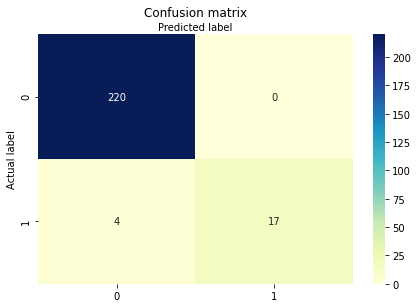

In [102]:
draw_confusion_matrix(logistic_regression,test_X,test_y)

In [103]:
roc_curve(test_y, logistic_regression.predict(test_X))

(array([0., 0., 1.]),
 array([0.        , 0.80952381, 1.        ]),
 array([2, 1, 0]))

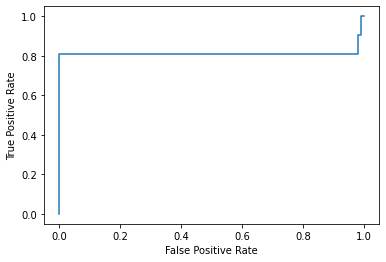

In [104]:
y_pred_proba = logistic_regression.predict_proba(test_X)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_y,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [105]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print('roc score:',roc_auc_score(test_y,y_pred_proba))


roc score: 0.8121212121212121


In [106]:
compare_RMSE(logistic_regression,train_X, train_y,test_X,test_y)

Test set RMSE: 0.12883132528016616
CV RMSE: 0.11180339887498948
Training set RMSE: 0.0944911182523068


### random forest


In [107]:
#random forest
random_forest, acc_random_forest,rf_mean_cv_score = classifier(RandomForestClassifier(n_estimators = 1000, max_depth = 5,  max_features = 10))

Cross Validation Scores are [1.         1.         0.99107143 1.         1.        ]
Average Cross Validation score :0.9982142857142857
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       0.95      1.00      0.98        21

    accuracy                           1.00       241
   macro avg       0.98      1.00      0.99       241
weighted avg       1.00      1.00      1.00       241

accuracy:  0.995850622406639


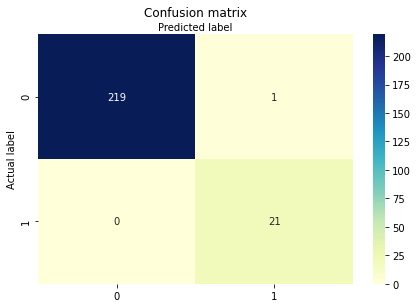

In [108]:
draw_confusion_matrix(random_forest,test_X,test_y)

In [109]:
compare_RMSE(random_forest,train_X, train_y,test_X,test_y)

Test set RMSE: 0.06441566264008308
CV RMSE: 0.042257712736425826
Training set RMSE: 0.0


In [110]:
importances = random_forest.feature_importances_
std = np.std([random_forest.feature_importances_ for tree in random_forest.estimators_], axis=0)

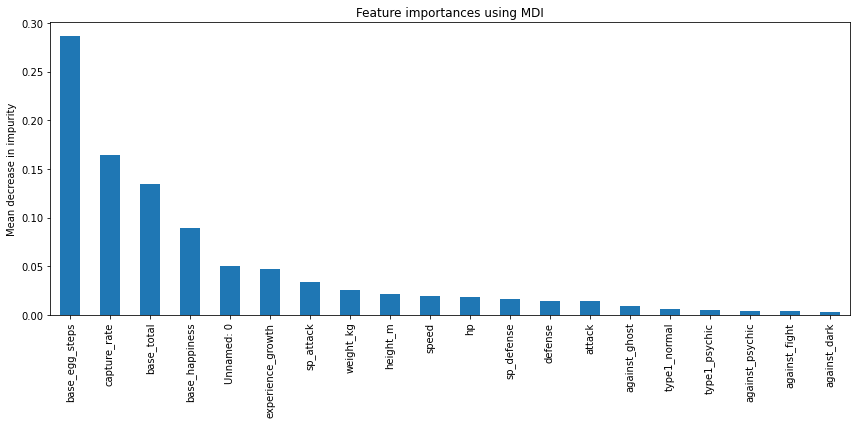

In [111]:
forest_importances = pd.Series(importances, index=train_X.columns)
forest_importances = forest_importances.sort_values(ascending=False)
forest_importances = forest_importances[:20]
fig, ax = plt.subplots()

forest_importances.plot.bar(yerr=std[:20], ax=ax,figsize=(12, 6))
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### SGD

In [112]:
#SGD
SGD, acc_sgd,SGD_mean_cv_score = classifier(SGDClassifier())

Cross Validation Scores are [0.89285714 0.92857143 0.99107143 0.90178571 0.99107143]
Average Cross Validation score :0.9410714285714287
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       220
           1       0.00      0.00      0.00        21

    accuracy                           0.91       241
   macro avg       0.46      0.50      0.48       241
weighted avg       0.83      0.91      0.87       241

accuracy:  0.9128630705394191


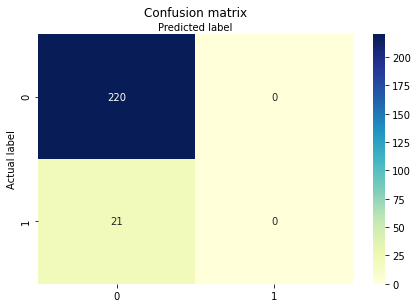

In [113]:
draw_confusion_matrix(SGD,test_X,test_y)

In [114]:
# Evaluate the model by comparing three RMSE's.
compare_RMSE(SGD,train_X, train_y,test_X,test_y)

Test set RMSE: 0.29518964998891967
CV RMSE: 0.4686607057806928
Training set RMSE: 0.2958039891549808


### decision tree

In [115]:
#decision tree
decision_tree, acc_decision_tree, decision_tree_mean_cv_score= classifier(DecisionTreeClassifier())

Cross Validation Scores are [1.         0.98214286 0.98214286 0.99107143 0.99107143]
Average Cross Validation score :0.9892857142857144
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       1.00      0.95      0.98        21

    accuracy                           1.00       241
   macro avg       1.00      0.98      0.99       241
weighted avg       1.00      1.00      1.00       241

accuracy:  0.995850622406639


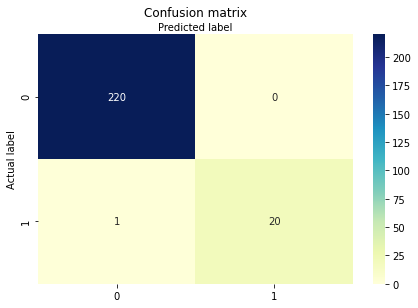

In [116]:
draw_confusion_matrix(decision_tree,test_X,test_y)

In [117]:
compare_RMSE(decision_tree,train_X, train_y,test_X,test_y)

Test set RMSE: 0.06441566264008308
CV RMSE: 0.07319250547113999
Training set RMSE: 0.0


### SVC

In [118]:
#Linear SVC
linear_SVC, acc_linear_svc,linear_SVC_mean_cv_score = classifier(LinearSVC(max_iter = 100))

Cross Validation Scores are [0.98214286 0.98214286 0.98214286 0.96428571 0.9375    ]
Average Cross Validation score :0.9696428571428571
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       220
           1       1.00      0.62      0.76        21

    accuracy                           0.97       241
   macro avg       0.98      0.81      0.87       241
weighted avg       0.97      0.97      0.96       241

accuracy:  0.966804979253112


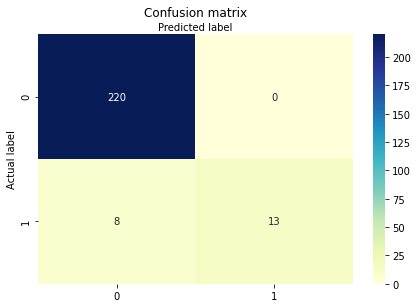

In [119]:
draw_confusion_matrix(linear_SVC,test_X,test_y)

In [120]:
compare_RMSE(linear_SVC,train_X, train_y,test_X,test_y)

Test set RMSE: 0.1821950074697108
CV RMSE: 0.17928429140015903
Training set RMSE: 0.1742330131092924


### GaussianNB


In [121]:
#GaussianNB
gaussian_NB, acc_gnb,gaussian_NB_mean_cv_score = classifier(GaussianNB())

Cross Validation Scores are [0.98214286 0.98214286 0.96428571 0.96428571 0.98214286]
Average Cross Validation score :0.975
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       220
           1       0.75      0.86      0.80        21

    accuracy                           0.96       241
   macro avg       0.87      0.91      0.89       241
weighted avg       0.97      0.96      0.96       241

accuracy:  0.9626556016597511


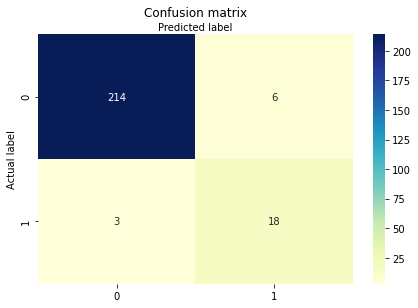

In [122]:
draw_confusion_matrix(gaussian_NB,test_X,test_y)

In [123]:
compare_RMSE(gaussian_NB,train_X, train_y,test_X,test_y)

Test set RMSE: 0.19324698792024925
CV RMSE: 0.1690308509457033
Training set RMSE: 0.15811388300841897


### KNeighbors Classifier


In [124]:
#KNeighbors Classifier
kneighbors, acc_knn,kneighbors_mean_cv_score = classifier(KNeighborsClassifier())

Cross Validation Scores are [0.99107143 0.99107143 0.99107143 0.98214286 0.98214286]
Average Cross Validation score :0.9875
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       220
           1       1.00      0.76      0.86        21

    accuracy                           0.98       241
   macro avg       0.99      0.88      0.93       241
weighted avg       0.98      0.98      0.98       241

accuracy:  0.979253112033195


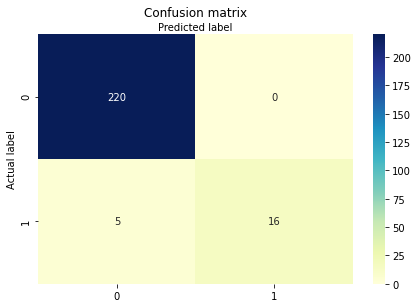

In [125]:
draw_confusion_matrix(kneighbors,test_X,test_y)

In [126]:
compare_RMSE(kneighbors,train_X, train_y,test_X,test_y)

Test set RMSE: 0.14403780047891934
CV RMSE: 0.11180339887498948
Training set RMSE: 0.11180339887498948


### Perceptron


In [127]:
#Perceptron
perceptron, acc_perceptron,perceptron_mean_cv_score = classifier(Perceptron())

Cross Validation Scores are [0.10714286 0.92857143 0.95535714 0.90178571 0.9375    ]
Average Cross Validation score :0.7660714285714286
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       220
           1       1.00      0.62      0.76        21

    accuracy                           0.97       241
   macro avg       0.98      0.81      0.87       241
weighted avg       0.97      0.97      0.96       241

accuracy:  0.966804979253112


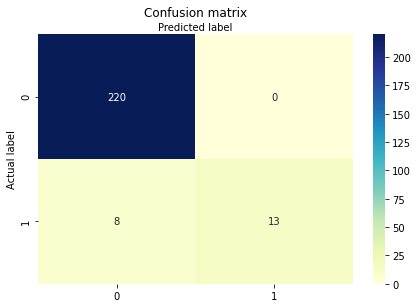

In [128]:
draw_confusion_matrix(perceptron,test_X,test_y)

In [129]:
compare_RMSE(perceptron,train_X, train_y,test_X,test_y)

Test set RMSE: 0.1821950074697108
CV RMSE: 0.23528098702858008
Training set RMSE: 0.1742330131092924


### All Model Accuracy

In [130]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Gaussain Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Descent'],
    
    'Score': [acc_log_reg, acc_linear_svc, 
              acc_knn,  acc_decision_tree, acc_random_forest, acc_gnb, 
              acc_perceptron, acc_sgd],
    
     'Average CV score': [log_mean_cv_score, linear_SVC_mean_cv_score, 
              kneighbors_mean_cv_score,  decision_tree_mean_cv_score, rf_mean_cv_score, gaussian_NB_mean_cv_score, 
              perceptron_mean_cv_score, SGD_mean_cv_score]   
    
    })

models.sort_values(by='Score', ascending=False)

,Model,Score,Average CV score
3,Decision Tree,0.995851,0.989286
4,Random Forest,0.995851,0.998214
0,Logistic Regression,0.983402,0.976786
2,KNN,0.979253,0.987500
1,Linear SVC,0.966805,0.969643
6,Perceptron,0.966805,0.766071
5,Gaussain Naive Bayes,0.962656,0.975000
7,Stochastic Gradient Descent,0.912863,0.941071
